# Exploratory Data Analysis Movie Industry

This project explores a data set from the movie industry over the last decades. The data can be found at Kaggle (https://www.kaggle.com/datasets/danielgrijalvas/movies/data). The project investigates the characteristics to predict the gross revenue, it asks whether features such as budget, director, votes or actors have an influence on the film revenue.  

<h2>Table of Contents</h2>

<ol>
    <li><a href="#import_data">Importing the data</a></li>
    <li><a href="#clean_data">Cleaning the data</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
</ol>

<h2 id="import_data"> 1. Importing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
#plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


<h2 id="clean_data"> 2. Cleaning the data

### Evaluating for missing data

We estimate the number of missing values in each column

In [4]:
df_missing_data = df.isnull()

In [5]:
for col in df_missing_data.columns.values.tolist():
    #print(col)
    print(df_missing_data[col].value_counts())
    print("")

name
False    7668
Name: count, dtype: int64

rating
False    7591
True       77
Name: count, dtype: int64

genre
False    7668
Name: count, dtype: int64

year
False    7668
Name: count, dtype: int64

released
False    7666
True        2
Name: count, dtype: int64

score
False    7665
True        3
Name: count, dtype: int64

votes
False    7665
True        3
Name: count, dtype: int64

director
False    7668
Name: count, dtype: int64

writer
False    7665
True        3
Name: count, dtype: int64

star
False    7667
True        1
Name: count, dtype: int64

country
False    7665
True        3
Name: count, dtype: int64

budget
False    5497
True     2171
Name: count, dtype: int64

gross
False    7479
True      189
Name: count, dtype: int64

company
False    7651
True       17
Name: count, dtype: int64

runtime
False    7664
True        4
Name: count, dtype: int64



In [6]:
# check missing data percentage for each variable
for col in df.columns:
    pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Dealing with missing data

We could use different methods to deal with missing data. We could decide whether to drop the data or replace it. The approach will depend on the variable. In this case we could:

<b>Replace by mean:</b>
<ul>
    <li>"score": 3 missing data, replace them with mean</li>
    <li>"votes": 3 missing data, replace them with mean</li>
    <li>"runtime": 4 missing data, replace them with mean</li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"budget": 2171 missing data, delete the whole row
    <li>"gross": 189 missing data, delete the whole row
        <ul>
            <li>Reason: We want to see the correlation between the budget and gross. We cannot use any data entry without budget or gross data for the analysis. We want valid values for these two variables; therefore any row without data is not useful.</li>
        </ul>
    </li>
    <li>"star": 1 missing data, delete the whole row</li>
    <li>"writer": 3 missing data, delete the whole row</li>
    <li>"released": 2 missing data, delete the whole row</li>
    <li>"company": 17 missing data, delete the whole row</li>
    <li>"country": 3 missing data, delete the whole row</li>
    <li>"rating": 77 missing data, delete the whole row</li>
            <ul>
            <li>Reason: These variables are hard to input well. It is better to drop the rows instead; there is not enough information to give a value.</li>
        </ul>
</ul>



**Estimate the mean and replace 'NaN' values with the mean**

In [7]:
#checking that all data is in the correct format
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#score
avg_score = df['score'].mean(axis=0)
df['score'].replace(np.nan,avg_score,inplace=True)
#check
print('Number of missing data:',np.sum(df['score'].isnull()))

Number of missing data: 0


In [9]:
#votes 
avg_votes = df['votes'].mean(axis=0)
df['votes'].replace(np.nan,avg_votes,inplace=True)
#check
print('Number of missing data:',np.sum(df['votes'].isnull()))

Number of missing data: 0


In [10]:
#runtime
avg_runtime = df['runtime'].mean(axis=0)
df['runtime'].replace(np.nan,avg_runtime,inplace=True)
#check
print('Number of missing data:',np.sum(df['runtime'].isnull()))


Number of missing data: 0


**Drop all the rows with missing data**

In [11]:
df.dropna(subset=["rating","released","director","writer","star","country","budget","gross","company"],axis=0,inplace=True)


In [12]:
#reset index since we droped rows
df.reset_index(drop=True, inplace=True)

In [13]:
#check for missing data
print('missing data:',df.isnull().sum())

missing data: name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


Now we have a data set with no missing values!

## Correct data format

We want to check that all data is in the correct data format. We convert data types to proper format.

In [14]:
df[["gross","budget"]] = df[["gross","budget"]].astype("int64")

In [15]:
#df.head()

We also note from the data information that the column "release" corresponds to the release date, and the column "year" corresponds to the year of release. Therefore, the year variable and the year extracted from the release column should be equal. We notice that this is not the case, so we create a new column with the correct year.

In [16]:
#this line finds a comma followed by an optional space and extracts the four digits after the comma
df["year_correct"] = df["released"].astype(str).str.extract(r',\s*(\d{4})')

In [17]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


Now, let's sort the dataframe by the movies with the highest revenue

In [18]:
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
5303,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
4731,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
5159,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [19]:
#if we want to see all the data we can run
#pd.set_option('display.max_rows',None)

## Finding and removing duplicates


This line is showing us all the unique values for the company variable. We do not need to drop the duplicates for our analysis. We can also notice that there are similar names for different companies, like 'Walt Disney'. We could standardize it and use a single name. But this corresponds to the name the company had during different periods of time, so we do not need to change it.

In [20]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

5102        thefyzz
3920    micro_scope
2551       i5 Films
4835     i am OTHER
4538           erbp
Name: company, dtype: object

In [21]:
#this will remove any duplicates
#df.drop_duplicates()

<h2 id="eda"> 3. Exploratory Data Analysis

## Finding Correlation

We create a scatter plot to explore any type of correlation between the budget and the revenue

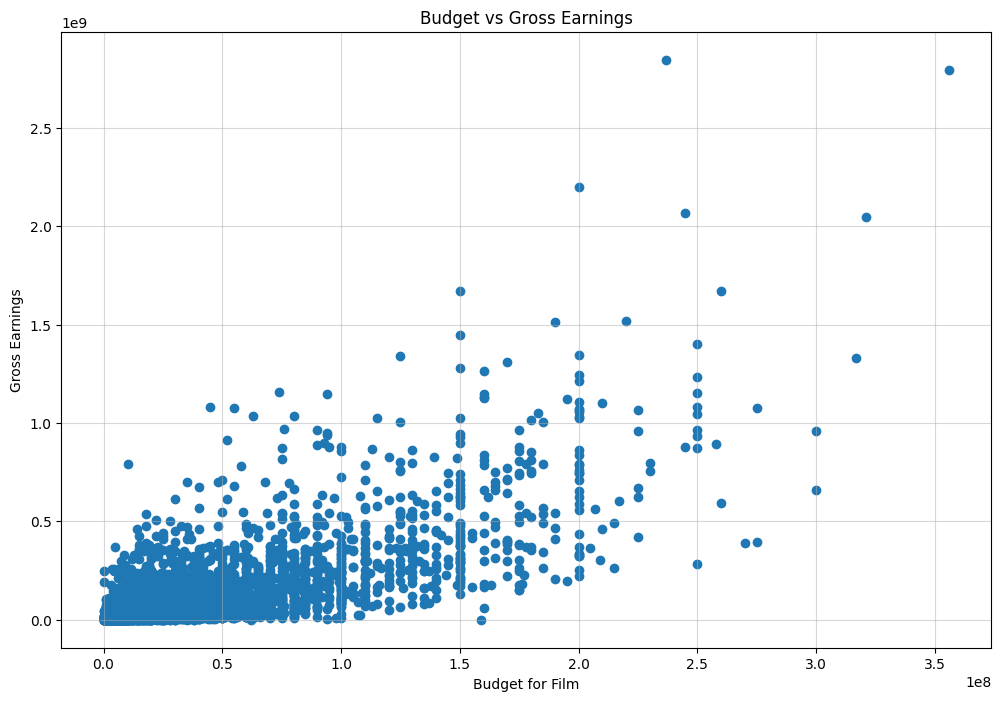

In [37]:
plt.scatter(df["budget"],df["gross"],marker='o')
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")
plt.grid(alpha=0.5)

In [23]:
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
5303,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
4731,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
5159,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


Visually, we can see a slightly positive correlation between the revenue and the budget for the film. Now let's see this more accurately by using a regression plot. 

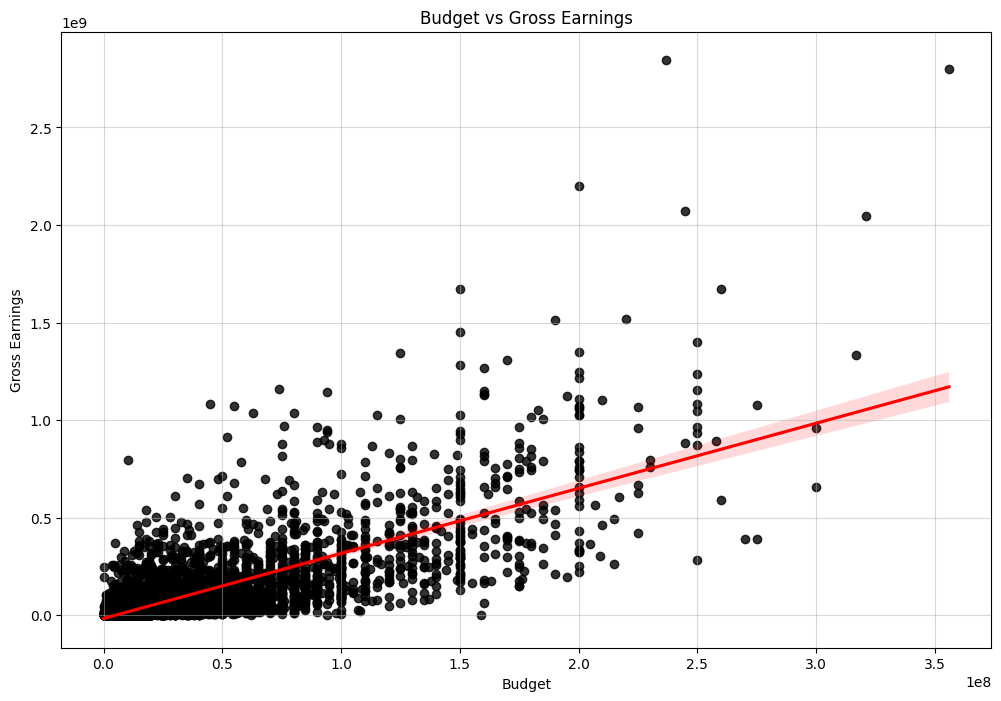

In [38]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.grid(alpha=0.5)

We can notice that as the budget goes up, the revenue goes up: this indicates a positive correlation between these two variables. 

## Calculating correlation coefficient

### Budget vs Gross Earnings

Now we can estimate the correlation coefficient between the 'Budget' and 'Revenue' variables. We see that it's approximately $0.74$, which indicates a strong positive linear correlation. We could say that the 'Budget' is a potential predictor of 'Gross Earnings'.

In [25]:
df[['budget','gross']].corr()

,budget,gross
budget,1.000000,0.740231
gross,0.740231,1.000000


### Correlation between all numerical variables

We can also see the correlation between all numerical variables with the following table

In [26]:
df.corr(method='pearson',numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056169,0.205926,0.327710,0.274231,0.075062
score,0.056169,1.000000,0.474277,0.071972,0.222600,0.414029
votes,0.205926,0.474277,1.000000,0.439661,0.614761,0.352301
budget,0.327710,0.071972,0.439661,1.000000,0.740231,0.318694
gross,0.274231,0.222600,0.614761,0.740231,1.000000,0.275796
runtime,0.075062,0.414029,0.352301,0.318694,0.275796,1.000000


<Axes: >

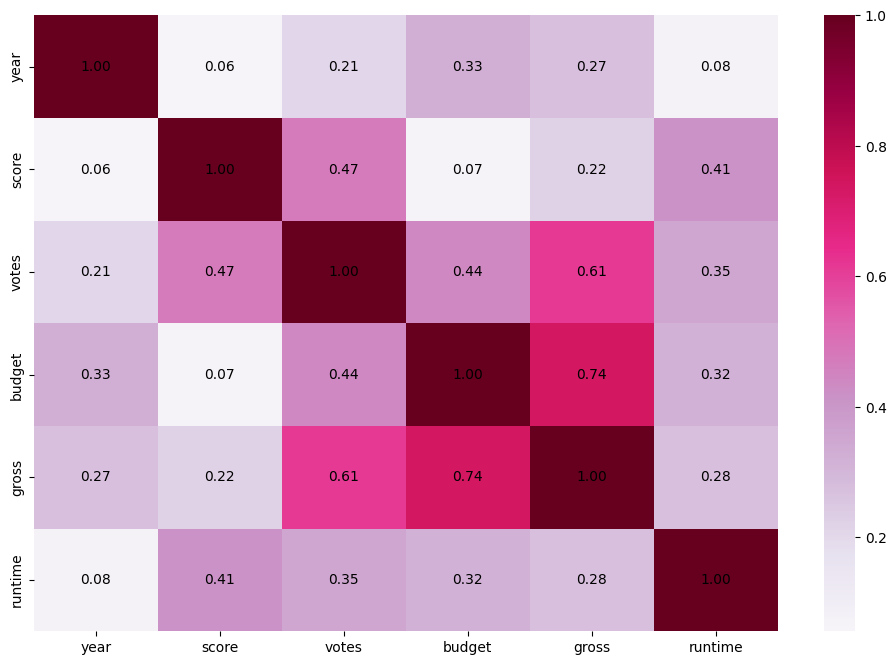

In [27]:
#visualize the correlation matrix
correlation_matrix = df.corr(method='pearson',numeric_only = True)
sns.heatmap(correlation_matrix,cmap='PuRd',annot=True,fmt=".2f", annot_kws={"size": 10, "color": "black"})


### Votes vs Gross Earnings

We can explore the correlation between the 'Gross Earnings' and 'Votes' using a regression plot. We can notice that there is also a linear positive correlation between these two variables. 

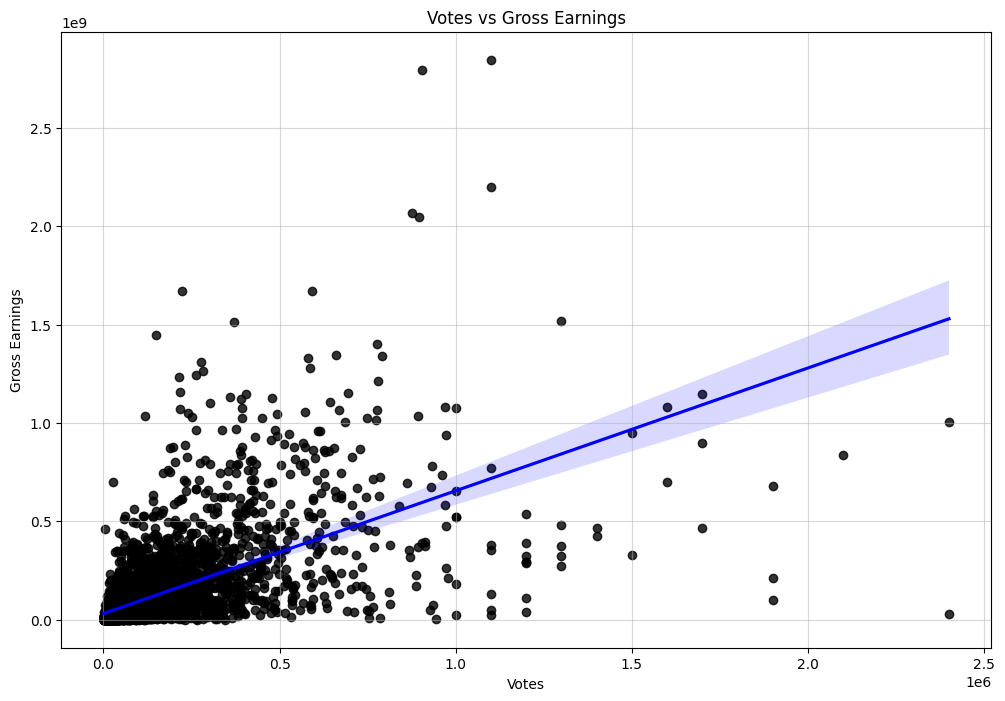

In [39]:
sns.regplot(x='votes',y='gross',data=df,scatter_kws={"color":"black"},line_kws={"color":"blue"})
plt.title("Votes vs Gross Earnings")
plt.xlabel("Votes")
plt.ylabel("Gross Earnings")
plt.grid(alpha=0.5)

## Categorical Variables

Now, let's explore the relation between categorical variables and the revenue. We can use boxplots for visualization. Let's see the relation between the genre and the revenue.

Text(0.5, 1.0, 'Genre Boxplot')

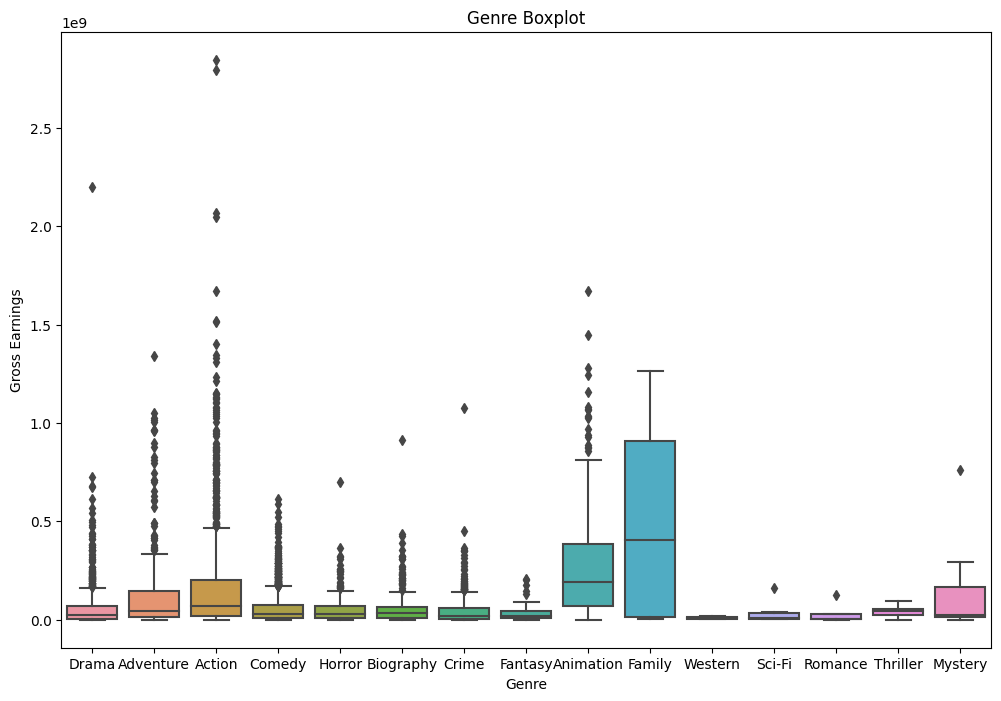

In [41]:
sns.boxplot(x='genre',y='gross',data=df)
plt.xlabel('Genre')
plt.ylabel('Gross Earnings')
plt.title('Genre Boxplot')

We can notice that the distribution of 'gross' between the different genre categories differs. Therefore, the 'genre' could be a potential predictor of revenue. However, there are some limitations, since there is a significant overlap across the different categories. The median in genres like 'Family' and 'Animation' are significantly higher, which could indicate a potential for higher gross. There are also genres with extreme outliers, which could distort correlation. 

## DESCRIPTIVE Statistical Analysis

We can compute basic statistics for all continuous variables. The summary is shown in the table below.

In [32]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5422.000000,5422.000000,5.422000e+03,5.422000e+03,5.422000e+03,5422.000000
mean,2001.663224,6.392254,1.150525e+05,3.600991e+07,1.032176e+08,108.152575
std,10.540871,0.962755,1.843930e+05,4.156957e+07,1.872875e+08,18.114031
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.074116e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.190000e+07,3.689052e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124328e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


We can do the same for categorical variables

In [33]:
df.describe(include=['object'])

,name,rating,genre,released,director,writer,star,country,company,year_correct
count,5422,5422,5422,5422,5422,5422,5422,5422,5422,5408
unique,5337,10,15,2560,2063,3206,1845,50,1475,41
top,Hercules,R,Comedy,"August 26, 2016 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures,2011
freq,3,2597,1496,7,33,32,40,4320,330,170


We can also use value_counts to explore how many units of a particular category we have

In [34]:
company_counts = df["company"].value_counts()
company_counts.head(10)

company
Universal Pictures           330
Columbia Pictures            302
Warner Bros.                 298
Paramount Pictures           279
Twentieth Century Fox        209
New Line Cinema              155
Walt Disney Pictures         107
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     99
Dreamworks Pictures           75
Name: count, dtype: int64

In [35]:
rating_counts = df["rating"].value_counts()
rating_counts

rating
R            2597
PG-13        1730
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

In [36]:
country_counts = df["country"].value_counts()
country_counts.head(10)

country
United States     4320
United Kingdom     492
Canada             111
France             105
Germany             82
Australia           42
Japan               28
China               26
Hong Kong           24
Ireland             21
Name: count, dtype: int64

## Grouping Data

We can also group data to explore the relation between different categories in the variables and the gross earnings of the films. We could explore for example, if the production company has an impact in the film revenue. 

In [42]:
#Is there a relation between the company and the gross revenue from a movie?
df_test = df[["company","gross"]]
df_grp = df_test.groupby(["company"],as_index=False).mean()
df_grp.sort_values(by=['gross'],inplace=False,ascending=False).head(10)

,company,gross
983,Marvel Studios,1.255466e+09
820,Illumination Entertainment,1.097122e+09
628,Fairview Entertainment,9.665549e+08
190,B24,8.806815e+08
182,Avi Arad Productions,8.560852e+08
406,Chris Morgan Productions,7.590569e+08
870,Jolie Pas,7.584118e+08
945,Lucasfilm,7.185352e+08
982,Marvel Entertainment,7.144215e+08
227,Beijing Dengfeng International Culture Communi...,6.999925e+08


We could also filter the data by year and see what company had the highest revenue each year

In [51]:
#Is there a relation between the company and the gross revenue from a movie?
df_test2 = df[["company","gross","year_correct"]]
df_grp2 = df_test2.groupby(["company","year_correct"],as_index=False).mean()

df_grp_year = df_grp2[df_grp2["year_correct"]=="2020"]
df_grp_year_sorted = df_grp_year.sort_values(by=['gross'],inplace=False,ascending=False)
df_grp_year_sorted.head(10)

,company,year_correct,gross
378,Beijing Diqi Yinxiang Entertainment,2020,461421559.0
770,Columbia Pictures,2020,426505244.0
992,Dreamworks Pictures,2020,384623579.0
2918,Warner Bros.,2020,363656624.0
2133,Paramount Pictures,2020,319715683.0
719,Clubhouse Pictures (II),2020,201858461.0
2791,Universal Pictures,2020,194319376.5
1,"""Weathering With You"" Film Partners",2020,193457467.0
13,20th Century Studios,2020,111105497.0
1036,Emphatic Films,2020,226421.0


Let's use a bar plot to visualize gross revenue for each production company in the year 2020

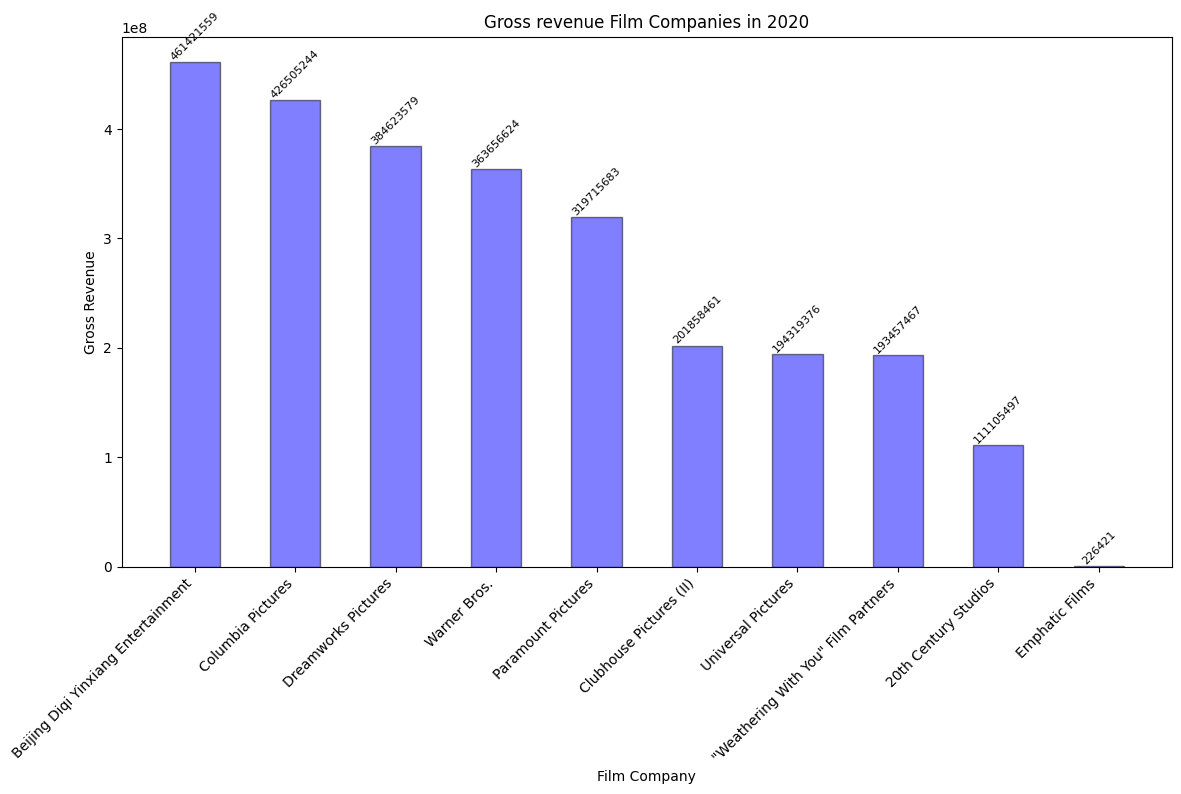

In [52]:
#the gross revenue of film companies in 2020
bars = plt.bar(df_grp_year_sorted["company"],df_grp_year_sorted["gross"],width=0.5,color="blue",alpha=0.5,edgecolor="black")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height:.0f}',  # Format number with commas
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.xticks(rotation=45, ha='right')
plt.title("Gross revenue Film Companies in 2020")
plt.xlabel("Film Company")
plt.ylabel("Gross Revenue")

plt.tight_layout()

We can notice that big production companies like 'Columbia Pictures' and 'Paramount Pictures' have high gross earnings. Therefore, we could say that the variable 'company' could be a potential predictor of the 'gross earnings'. 

Now we could explore if the Director variable has an impact on the Gross Earnings. We can group the data by Director. The following table presents the 10 directors, whose movies had the highest revenues.

In [55]:
df_test3 = df[["gross","director","year_correct"]]
df_grp3 = df_test3.groupby(["director"],as_index=False).mean(numeric_only=True)
df_top_directors = df_grp3.sort_values(by=["gross"],ascending=False,inplace=False).head(10)
df_top_directors

,director,gross
105,Anthony Russo,1.368850e+09
1144,Kyle Balda,1.097122e+09
1052,Josh Cooley,1.073395e+09
277,Chris Buck,1.059909e+09
1060,Joss Whedon,9.873567e+08
1162,Lee Unkrich,9.373943e+08
785,James Cameron,8.925841e+08
653,George Lucas,8.497511e+08
452,David Yates,8.407581e+08
768,J.J. Abrams,7.765626e+08


Now, we could see the 10 most popular directors based on the gross revenue

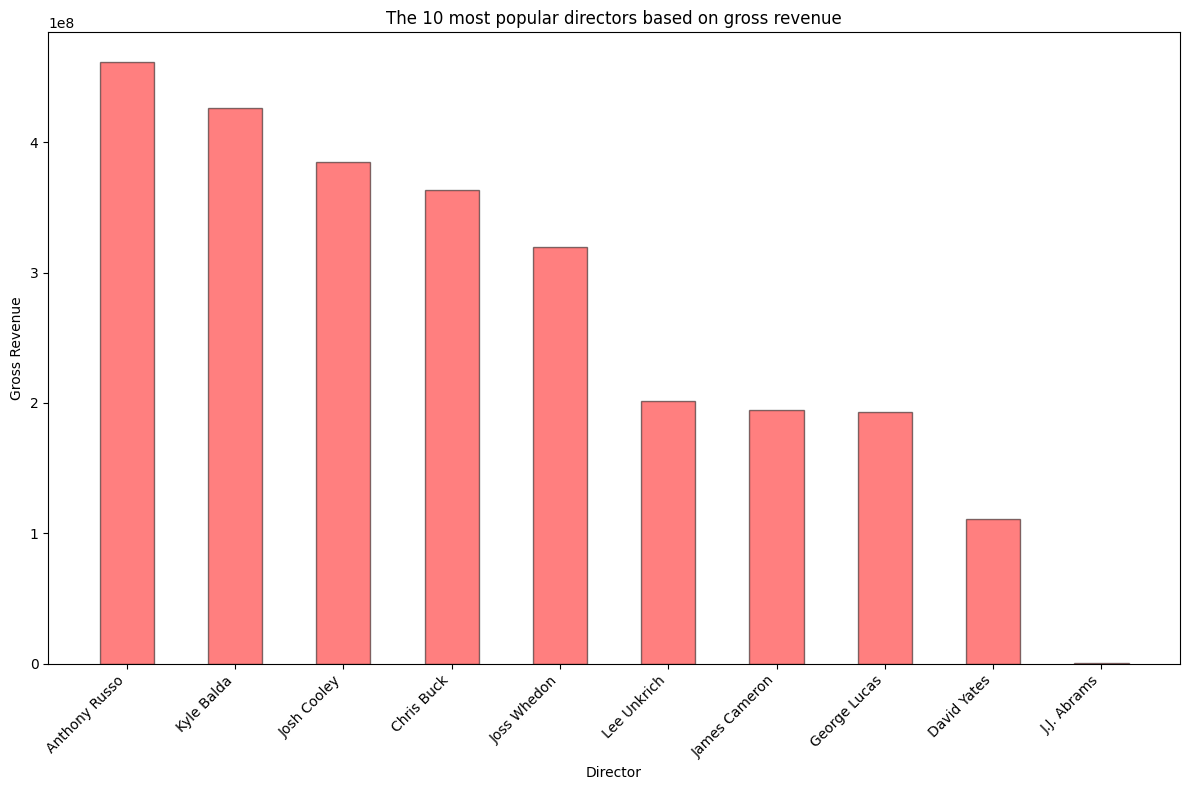

In [56]:
bars = plt.bar(df_top_directors["director"],df_grp_year_sorted["gross"],width=0.5,color="red",alpha=0.5,edgecolor="black")
plt.xticks(rotation=45, ha='right')
plt.title("The 10 most popular directors based on gross revenue")
plt.xlabel("Director")
plt.ylabel("Gross Revenue")

plt.tight_layout()

We could also filter the data by year to have a more accurate comparison. This table presents the directors and the gross earnings from the movies they produced. The data is sorted by gross earnings. 

In [58]:
df_grp4 = df_test3.groupby(["director","year_correct"],as_index=False).mean(numeric_only=True)
df_year4 = df_grp4[df_grp4["year_correct"]=="2020"]
df_dir_year_sorted = df_year4.sort_values(by=["gross"],ascending=False,inplace=False)
df_dir_year_sorted

,director,year_correct,gross
1804,Hu Guan,2020,461421559.0
37,Adil El Arbi,2020,426505244.0
4392,Sam Mendes,2020,384623579.0
798,Christopher Nolan,2020,363656624.0
2077,Jeff Fowler,2020,319715683.0
4602,Stephen Gaghan,2020,245487753.0
674,Cathy Yan,2020,201858461.0
2981,Makoto Shinkai,2020,193457467.0
2890,Leigh Whannell,2020,143151000.0
741,Chris Sanders,2020,111105497.0


Now, we can see the most popular directors sorted by gross revenue in the year 2020

Text(0, 0.5, 'Gross Revenue')

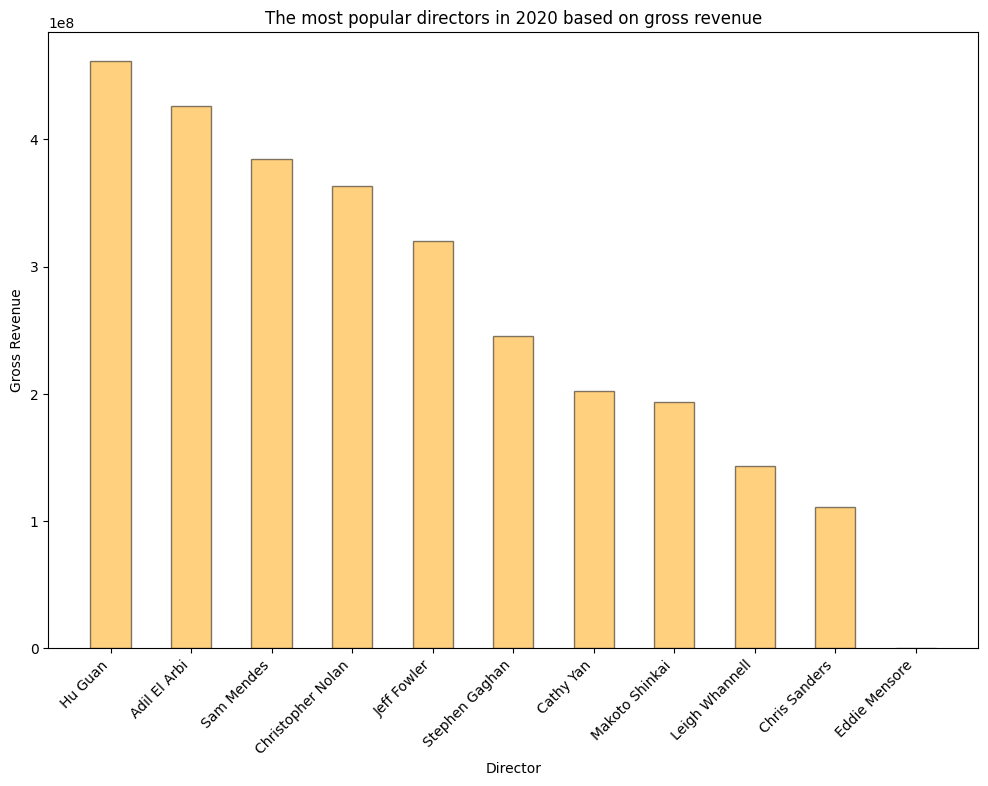

In [59]:
plt.bar(df_dir_year_sorted["director"],df_dir_year_sorted["gross"],width=0.5,color="orange",alpha=0.5,edgecolor="black")
plt.xticks(rotation=45, ha='right')
plt.title("The most popular directors in 2020 based on gross revenue")
plt.xlabel("Director")
plt.ylabel("Gross Revenue")

Let's see the movie with the highest gross revenue per year over all years of data

In [91]:
#find the movie with the highest gross per year
df_max = df[["gross","year_correct"]]
df_max_grp = df_max.groupby(['year_correct'],as_index=False).max(numeric_only=True)
# now we need to merge the df to see which movies correspond to the highest revenue
df_max_movie = pd.merge(df_max_grp, df, on=['year_correct', 'gross'], how='left')
#we get the columns we want
df_max_gross = df_max_movie[["year_correct","name","gross"]]
df_max_gross


,year_correct,name,gross
0,1980,Star Wars: Episode V - The Empire Strikes Back,538375067
1,1981,Indiana Jones and the Raiders of the Lost Ark,389925971
2,1982,E.T. the Extra-Terrestrial,792910554
3,1983,Star Wars: Episode VI - Return of the Jedi,475106177
4,1984,Indiana Jones and the Temple of Doom,333107271
5,1985,Back to the Future,381906762
6,1986,Top Gun,357288178
7,1987,Fatal Attraction,320145693
8,1988,Rain Man,354825435
9,1989,Indiana Jones and the Last Crusade,474171806


In [103]:
len(df_max_movie)

41

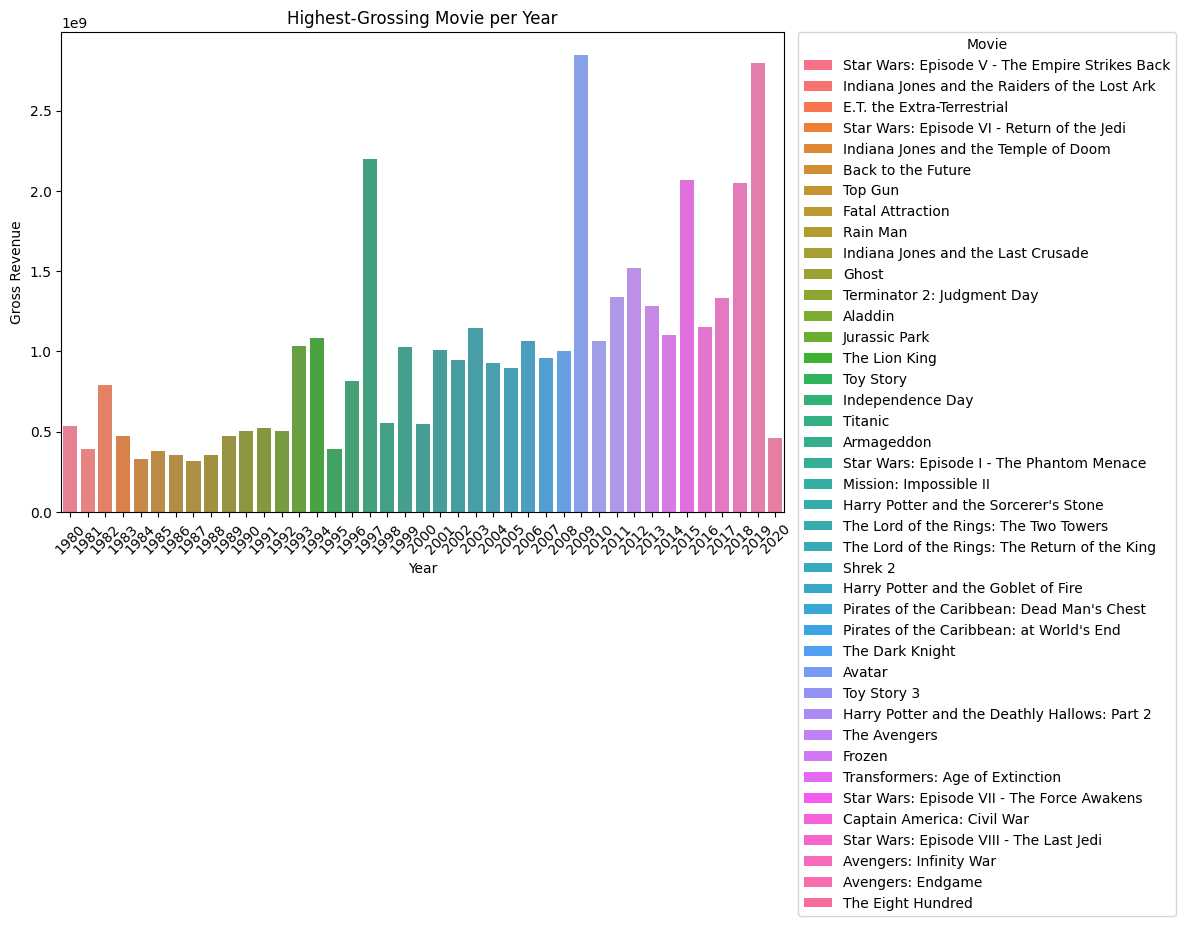

In [112]:
#visualization
from matplotlib.patches import Patch

df_max_movie_sorted = df_max_movie.sort_values("year_correct")
num_movies = len(df_max_movie_sorted)

sns.barplot(data=df_max_movie_sorted, x="year_correct", y="gross",palette="husl")
#add legend with movie names
movie_labels = df_max_movie_sorted['name'].tolist()
colors = sns.color_palette("husl",num_movies)
legend_elements = [Patch(facecolor=colors[i], label=movie_labels[i]) for i in range(len(movie_labels))]
plt.legend(handles=legend_elements, title="Movie", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title("Highest-Grossing Movie per Year")
plt.xlabel("Year")
plt.ylabel("Gross Revenue")
plt.tight_layout()


We could also see which were the most popular movies over the last years based on the IMDb score

In [124]:
df_max_score = df.groupby('year_correct',as_index=False)['score'].max()
# now we merge the dataframes to get the names of the movies with the highest IMDb score
df_score_movie = pd.merge(df_max_score,df,on=["year_correct","score"],how='left')
df_max_score_movie = df_score_movie[["year_correct","name","score"]]


In [125]:
#visualization of movies with highest IMDB scores
df_styled = df_max_score_movie.sort_values("year_correct").style\
    .bar(subset=["score"], color='#5fba7d')\
    .set_caption("Movies with the highest IMDb score per year")\
    .set_table_styles([{'selector': 'caption','props': [('font-size', '16px')]}])

df_styled

,year_correct,name,score
0,1980,Star Wars: Episode V - The Empire Strikes Back,8.700000
1,1981,Indiana Jones and the Raiders of the Lost Ark,8.400000
2,1982,Blade Runner,8.100000
3,1982,The Thing,8.100000
4,1982,Fanny and Alexander,8.100000
5,1983,Scarface,8.300000
6,1983,Star Wars: Episode VI - Return of the Jedi,8.300000
7,1984,Once Upon a Time in America,8.400000
8,1985,Back to the Future,8.500000
9,1986,Aliens,8.300000


Now we have a list with the most popular movies over the last decades, this is the perfect recommendation for film fans! 

## Correlation between all variables

We would like to investigate the correlation between all variables. We could use a method to assign categories to 'object' type variables and turn them into numerical variables. In this way, we can estimate a correlation coefficient for all variables.

In [60]:
#we assign a number to each category in the categorical variables, to transform categorical variables into numerical
df_numerical = df.copy()

for col in df_numerical.columns:
    if(df_numerical[col].dtype == 'object'):
        df_numerical[col] = df_numerical[col].astype('category')
        df_numerical[col] = df_numerical[col].cat.codes

In [61]:
df_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4693,6,6,1980,1304,8.4,927000.0,1795,2833,699,46,19000000,46998772,1426,146.0,0
1,3930,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0
2,3642,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0


In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


We can notice that numerical variables remain unchanged, while categorical variables appear with a number. Each number is randomly assigned and corresponds to a specific category. For example, by comparing both dataframes: 'df' and 'df_numerical', we can notice that the country 'United States' has the '47' code in the dataframe with numerical variables.

In [63]:
# now we can estimate the correlation between all variables

corr_matrix_all = df_numerical.corr(method='pearson')
corr_matrix_all

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029238,0.010966,0.025559,-0.006160,0.014425,0.012607,0.015247,0.012906,-0.006881,-0.025482,0.023395,0.005632,0.021691,0.010848,0.026775
rating,-0.029238,1.000000,0.147823,0.019458,0.018100,0.066020,0.006047,0.014655,-0.003197,0.009193,0.008216,-0.203949,-0.181889,-0.092356,0.140793,0.019520
genre,0.010966,0.147823,1.000000,-0.073379,0.022237,0.035361,-0.135874,-0.008556,0.017288,0.003321,-0.009242,-0.368490,-0.243981,-0.071322,-0.059216,-0.070908
year,0.025559,0.019458,-0.073379,1.000000,-0.001817,0.056169,0.205926,-0.038347,-0.025682,-0.032139,-0.066679,0.327710,0.274231,-0.014334,0.075062,0.996724
released,-0.006160,0.018100,0.022237,-0.001817,1.000000,0.045957,0.028863,0.002307,0.007965,0.015699,-0.017254,0.019944,0.008528,-0.002406,0.008979,-0.005216
score,0.014425,0.066020,0.035361,0.056169,0.045957,1.000000,0.474277,0.005408,0.012573,0.007277,-0.043117,0.071972,0.222600,0.020655,0.414029,0.062433
votes,0.012607,0.006047,-0.135874,0.205926,0.028863,0.474277,1.000000,-0.010377,-0.005409,-0.017643,0.041525,0.439661,0.614761,0.118469,0.352301,0.204090
director,0.015247,0.014655,-0.008556,-0.038347,0.002307,0.005408,-0.010377,1.000000,0.261702,0.036593,0.011134,-0.009661,-0.029561,-0.008223,0.017433,-0.035732
writer,0.012906,-0.003197,0.017288,-0.025682,0.007965,0.012573,-0.005409,0.261702,1.000000,0.018539,0.022564,-0.039439,-0.035965,-0.003703,-0.017571,-0.023381
star,-0.006881,0.009193,0.003321,-0.032139,0.015699,0.007277,-0.017643,0.036593,0.018539,1.000000,-0.009985,-0.021472,-0.000010,0.014082,0.010107,-0.030822


<Axes: >

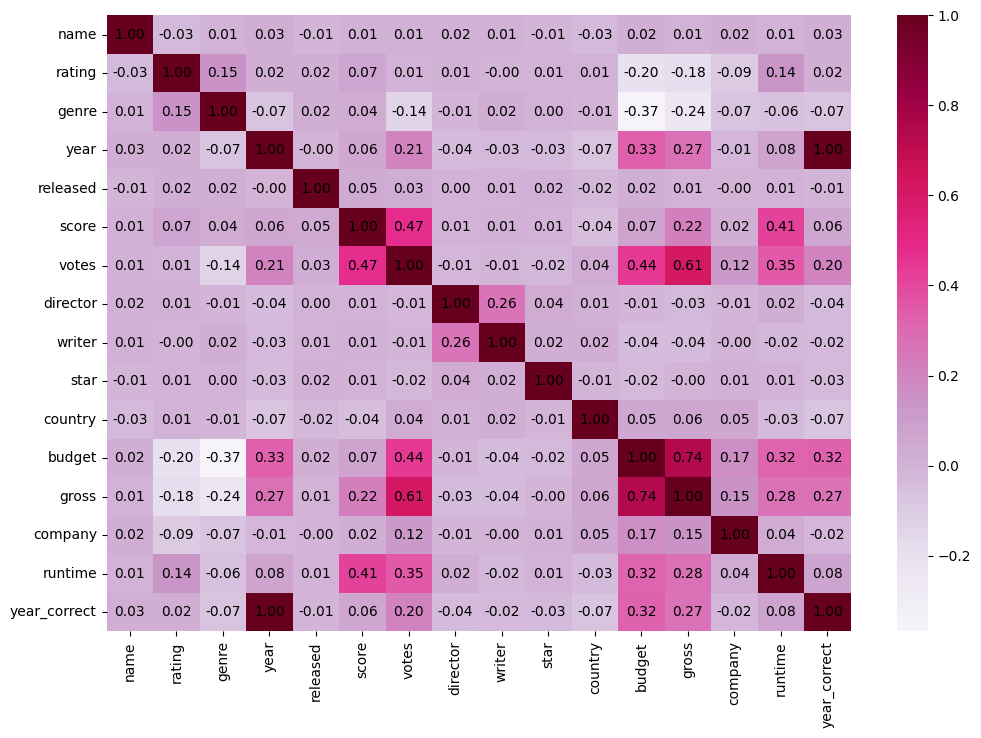

In [64]:
#visualize correlation matrix
sns.heatmap(corr_matrix_all,cmap='PuRd',annot=True,fmt=".2f", annot_kws={"size": 10, "color": "black"})

In [68]:
# we can also see the correlation pairs, i.e, what is the correlation of each variable with all variables in the dataset
corr_pairs = corr_matrix_all.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029238
              genre           0.010966
              year            0.025559
              released       -0.006160
                                ...   
year_correct  budget          0.321613
              gross           0.269391
              company        -0.015588
              runtime         0.076651
              year_correct    1.000000
Length: 256, dtype: float64

In [69]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368490
budget        genre          -0.368490
gross         genre          -0.243981
genre         gross          -0.243981
rating        budget         -0.203949
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [70]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes         gross           0.614761
gross         votes           0.614761
              budget          0.740231
budget        gross           0.740231
year_correct  year            0.996724
year          year_correct    0.996724
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

From the previous analysis we can see that we were expecting a high correlation between the revenue and the company, however, when estimating the correlation coefficient we notice that there is a weak correlation between these two variables. The question we want to answer in this project is: what are the main characteristics that have the most impact on the film revenues?

We now have a better understanding of our data and we know variables are important to take into account when predicting the revenue. We have found that the variables 'budget' and 'votes' are the variables that mostly affect the target variable 'Gross'. 
